In [146]:
%matplotlib inline

import os
import sys
import time

import SimpleITK as sitk
import numpy as np
import csv
from glob import glob
import pandas as pd

from matplotlib import pyplot as plt

import util
reload(util);

import luna_util
reload(luna_util);

In [26]:
_DATA_DIR = '../LUNA16/subset*'
_ANNOTATION_CSV = '../LUNA16/CSVFILES/annotations.csv'

In [27]:
file_list = glob(os.path.join(_DATA_DIR, '*.mhd'))
file_dict = {os.path.basename(f)[:-4] : f for f in file_list}

In [164]:
os.path.basename(file_list[0])

'1.3.6.1.4.1.14519.5.2.1.6279.6001.107351566259572521472765997306.mhd'

In [28]:
df_node = pd.read_csv(_ANNOTATION_CSV)
df_node['file'] = df_node['seriesuid'].map(lambda suid: file_dict.get(suid))
df_node = df_node.dropna()

In [29]:
p1_file = file_list[100]
p1_df = df_node[df_node.file==p1_file]

In [51]:
p1_itk = sitk.ReadImage(p1_file)
p1_image = sitk.GetArrayFromImage(p1_itk)
p1_spacing = 1
p1_image_resampled = util.resample(p1_image, p1_itk.GetSpacing()[::-1], p1_spacing)

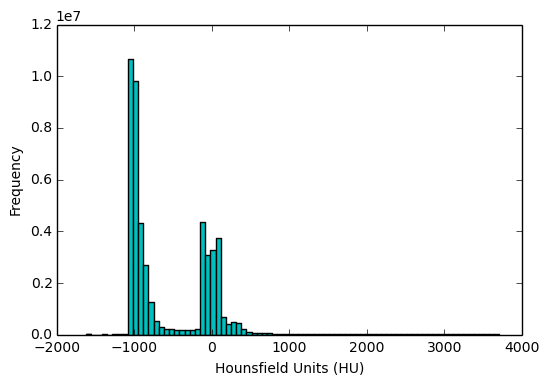

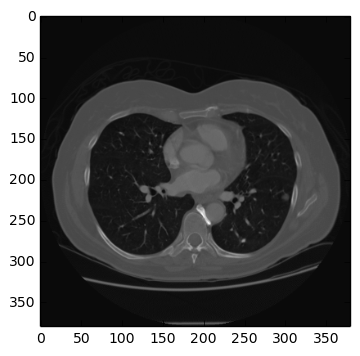

In [31]:
image = p1_image_resampled

# HU histogram
plt.figure()
plt.hist(image.flatten(), bins=80, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()

# Show some slice in the middle
plt.figure()
plt.imshow(image[image.shape[0]//2], cmap=plt.cm.gray)
plt.show()

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


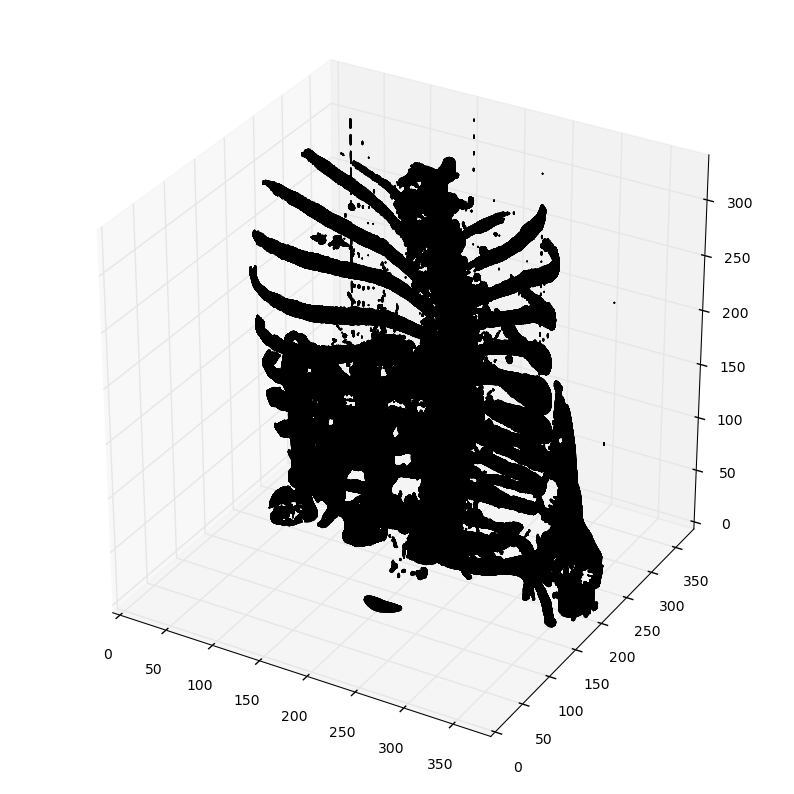

In [10]:
util.plot_3d(p1_image_resampled, 400)

In [52]:
p1_lungs = util.segment_lung_mask_v2(p1_image_resampled, p1_spacing)

(333, 380, 380)


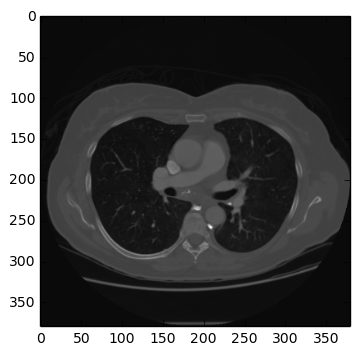

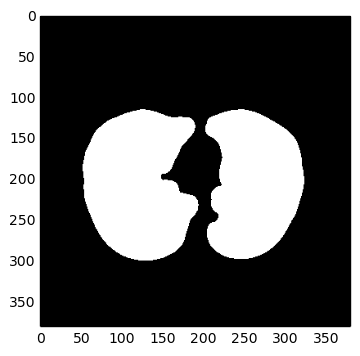

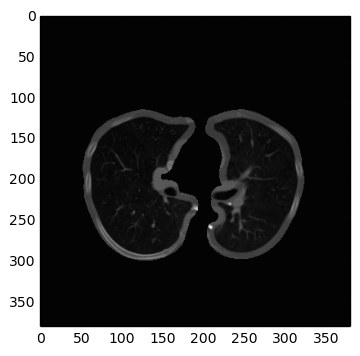

In [33]:
image = util.apply_mask(p1_image_resampled, p1_lungs)
print image.shape

z = 200

plt.figure()
plt.imshow(p1_image_resampled[z], cmap="gray")
plt.show()

plt.figure()
plt.imshow(p1_lungs[z], cmap="gray")
plt.show()

plt.figure()
plt.imshow(image[z], cmap="gray")
plt.show()

In [151]:
#x = p1_image
#spacing = p1_itk.GetSpacing()[0]
x = util.apply_mask(p1_image_resampled, p1_lungs)
nodules = luna_util.extract_nodule_masks(x, p1_spacing, np.array(p1_itk.GetOrigin()), p1_df)

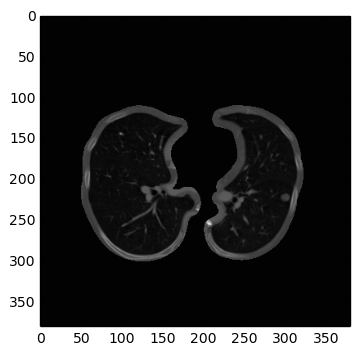

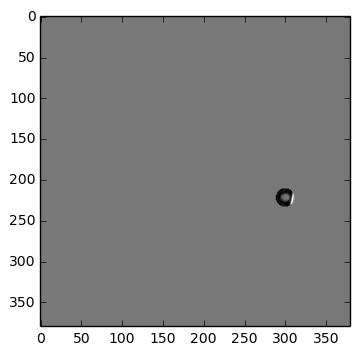

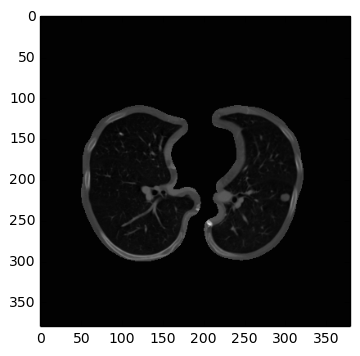

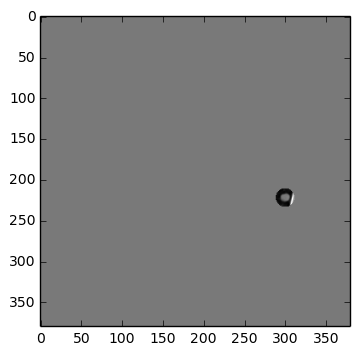

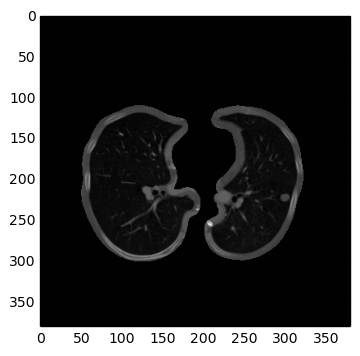

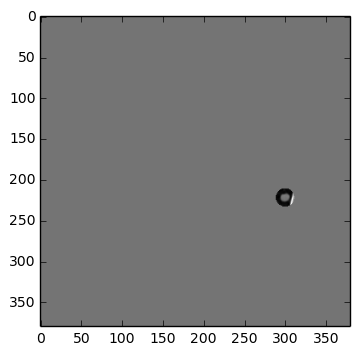

In [159]:
image, nodule_mask = nodules[3]
for i in range(image.shape[0]):
    plt.figure()
    plt.imshow(image[i], cmap='gray')
    plt.figure()
    plt.imshow(image[i] * nodule_mask[i], cmap='gray')